In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# path = "G:/Yash/Downloads/pcb4.jpeg"
path = "G:/Yash/Downloads/IMG13.tif"
folder_path = '/'.join(path.split('/')[:-1])
filename = path.split('/')[-1]
image = cv2.imread(path)

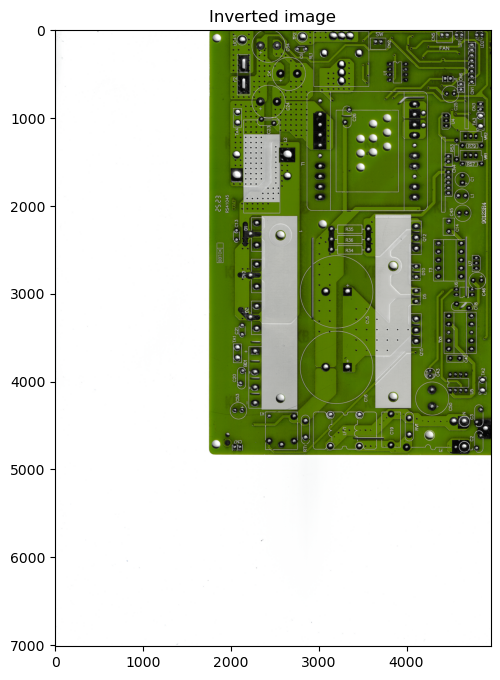

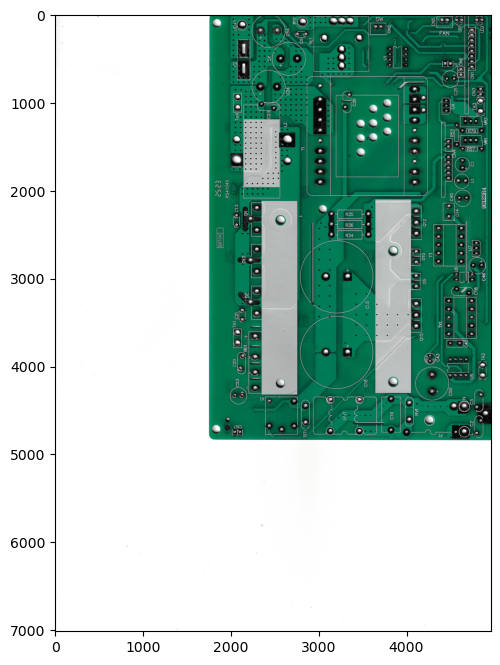

In [3]:
plt.figure(figsize=(16,8))
plt.imshow(image)
plt.title("Inverted image")
plt.show()
plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [5]:
# grayscale image 
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# imshow(title="Converted to Grayscale", image=gray_image, size=8)
# image is forst getting converted to COLOR_BGR2GRAY then imshow() fnc is again converting image to COLOR_BGR2RGB

In [6]:
# canny = cv2.Canny(image, 170, 260)
# imshow('Canny 1', canny, 10)

168 255


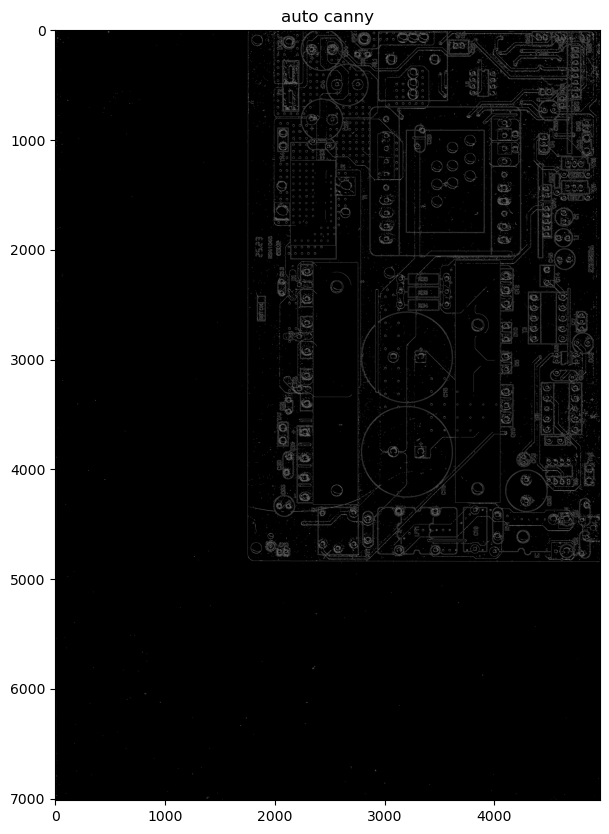

In [7]:
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  print(lower, upper)
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image)
imshow("auto canny", auto_canny,10)

In [8]:
# imshow('Original', auto_canny)

# # Let's define our kernel size
# kernel = np.ones((5,5), np.uint8)

# # Dilate here
# dilation = cv2.dilate(auto_canny, kernel, iterations = 1)
# imshow('Dilation', dilation)

In [9]:
# imshow('Original', image)

# dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
# imshow('fastNlMeansDenoisingColored', dst)

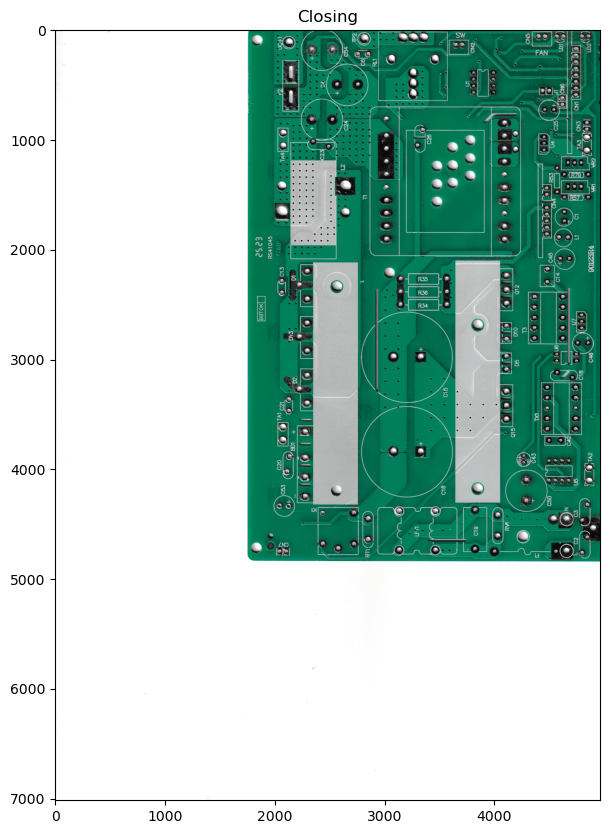

168 255


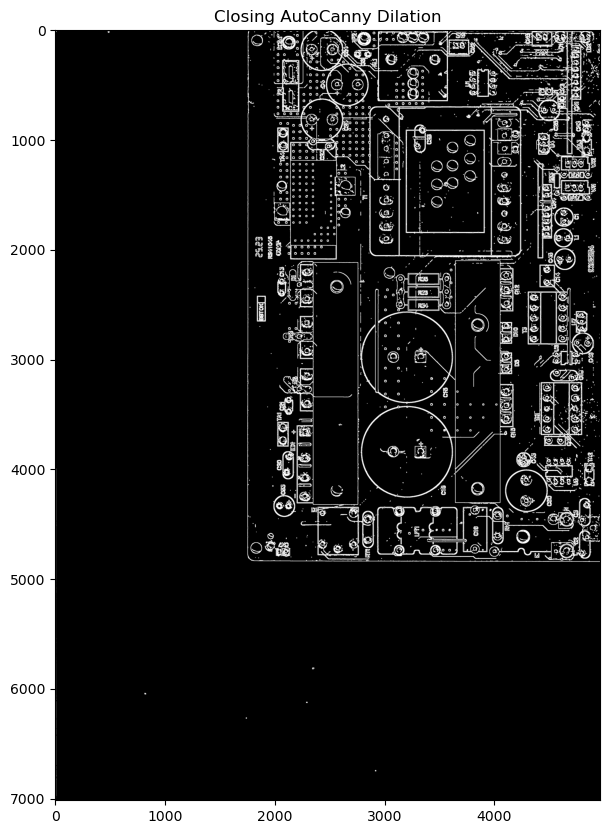

True

In [10]:
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

auto_canny1 = autoCanny(closing)
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Dilate here
dilation = cv2.dilate(auto_canny1, kernel, iterations = 1)
imshow('Closing AutoCanny Dilation', dilation)

cv2.imwrite(folder_path+'/'+filename.split('.')[0]+' Closing AutoCanny Dilation.tif', dilation)

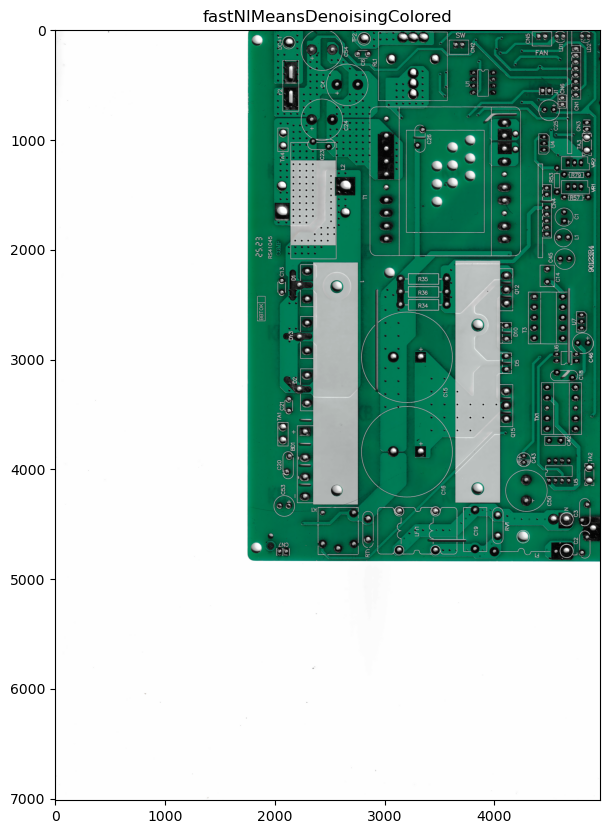

167 255


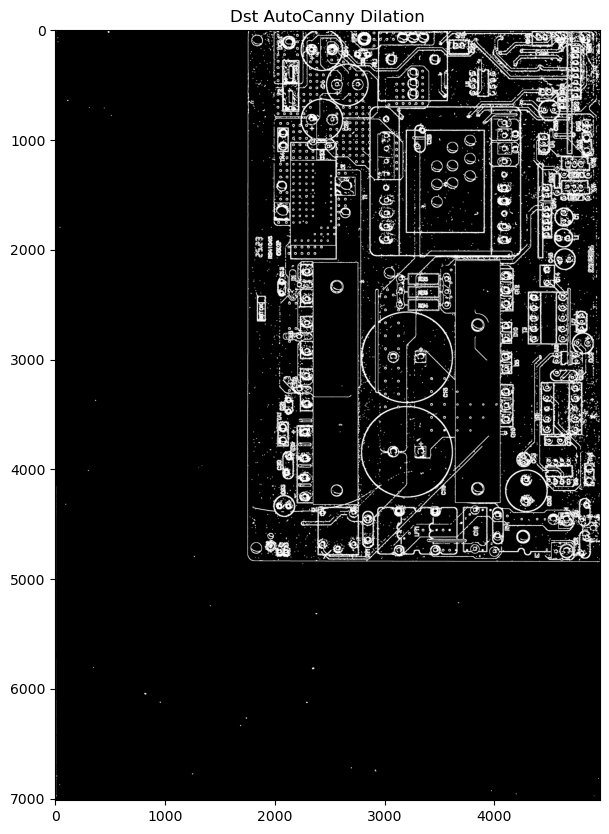

True

In [11]:
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow('fastNlMeansDenoisingColored', dst)

auto_canny2 = autoCanny(dst)
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Dilate here
dilation = cv2.dilate(auto_canny2, kernel, iterations = 1)
imshow('Dst AutoCanny Dilation', dilation)

cv2.imwrite(folder_path+'/'+filename.split('.')[0]+' Dst AutoCanny Dilation.tif', dilation)

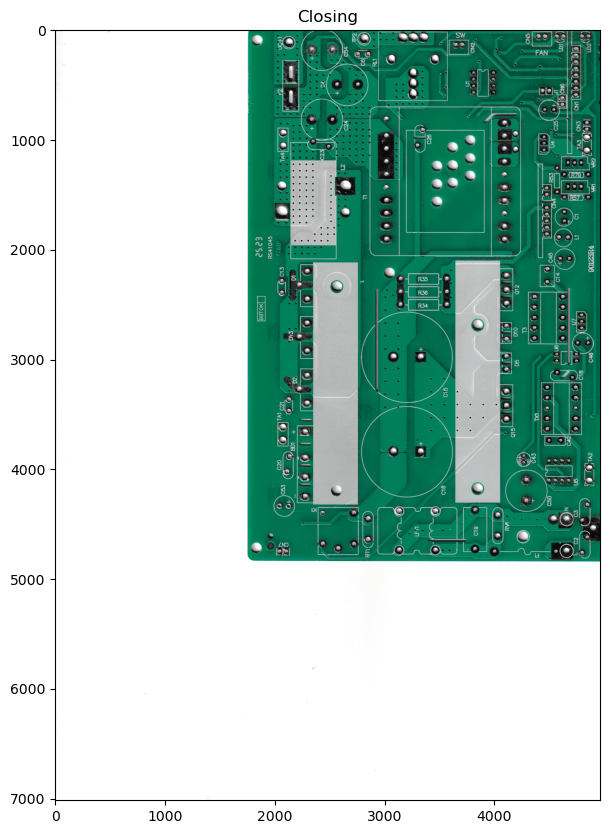

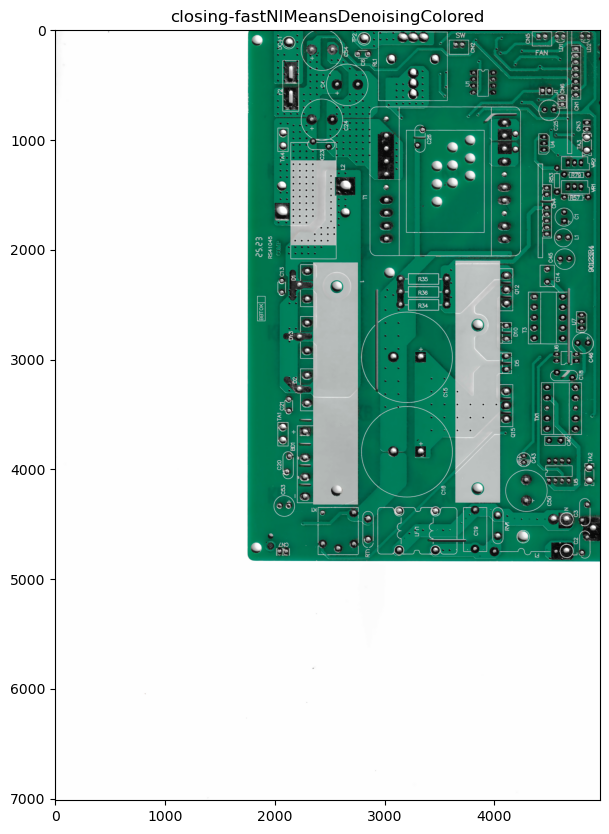

167 255


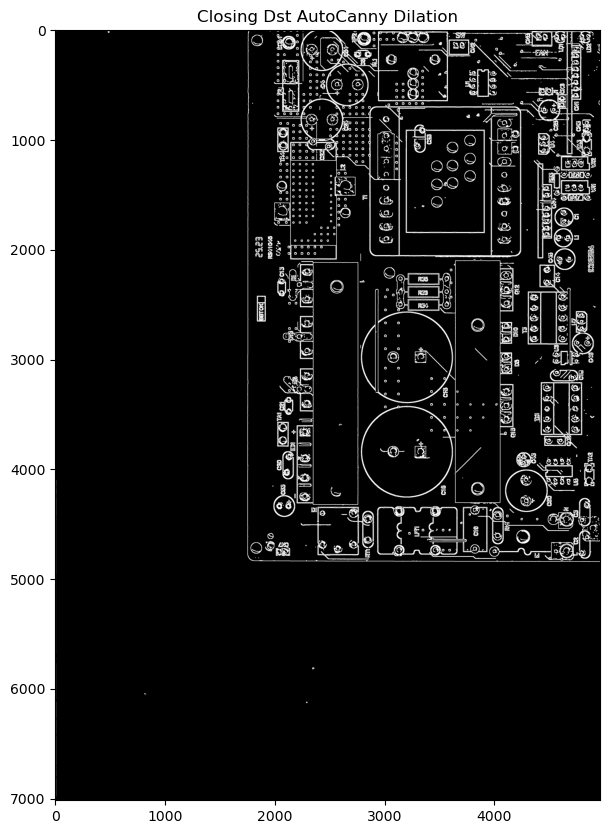

True

In [12]:
# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

dst = cv2.fastNlMeansDenoisingColored(closing, None, 6, 6, 7, 21)
imshow('closing-fastNlMeansDenoisingColored', dst)

auto_canny3 = autoCanny(dst)
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Dilate here
dilation = cv2.dilate(auto_canny3, kernel, iterations = 1)
imshow('Closing Dst AutoCanny Dilation', dilation)

cv2.imwrite(folder_path+'/'+filename.split('.')[0]+' Closing Dst AutoCanny Dilation.tif', dilation)